**Cognoloft** 


In [7]:
!wget --no-check-certificate https://pablosls-loft.s3.amazonaws.com/rps.zip -O /tmp/rps.zip
!wget --no-check-certificate https://pablosls-loft.s3.amazonaws.com/rps-test-set.zip -O /tmp/rps-test-set.zip

--2019-12-01 14:13:15--  https://pablosls-loft.s3.amazonaws.com/rps.zip
Resolving pablosls-loft.s3.amazonaws.com (pablosls-loft.s3.amazonaws.com)... 52.216.105.163
Connecting to pablosls-loft.s3.amazonaws.com (pablosls-loft.s3.amazonaws.com)|52.216.105.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50461597 (48M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>]  48.12M  25.8MB/s    in 1.9s    

2019-12-01 14:13:17 (25.8 MB/s) - ‘/tmp/rps.zip’ saved [50461597/50461597]

--2019-12-01 14:13:18--  https://pablosls-loft.s3.amazonaws.com/rps-test-set.zip
Resolving pablosls-loft.s3.amazonaws.com (pablosls-loft.s3.amazonaws.com)... 52.216.105.163
Connecting to pablosls-loft.s3.amazonaws.com (pablosls-loft.s3.amazonaws.com)|52.216.105.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24422651 (23M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[==================

In [9]:
ls /tmp/

rps-test-set.zip  rps.zip


In [0]:
!rm -rf /tmp/*

In [10]:
ls /tmp/

rps-test-set.zip  rps.zip


In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [12]:
ls /tmp/

rps/  rps-test-set/  rps-test-set.zip  rps.zip


In [13]:
class_dir = os.path.join('/tmp/rps/class')
notclass_dir = os.path.join('/tmp/rps/notclass')

print('total training class images:', len(os.listdir(class_dir)))
print('total training notclass images:', len(os.listdir(notclass_dir)))


class_files = os.listdir(class_dir)
print(class_files[:10])

notclass_files = os.listdir(notclass_dir)
print(notclass_files[:10])


total training class images: 77
total training notclass images: 150
['1nqx1s2_1.jpg', '1fyz4wo_desktop_living3.jpg', '15m0azs_desktop_banner.jpg', '1nqx1s2_desktop_banner.jpg', '1ktghio_desktop_banner.jpg', '1rdyrd3_desktop_living4.jpg', '16inbrc_desktop_living11.jpg', '6zx2a1_desktop_banner.jpg', '1hj22gw_desktop_living3.jpg', '1xyfdul_desktop_living4.jpg']
['00000070.jpg', '00000069.jpg', '00000017.jpg', '00000088.jpg', '00000051.jpg', '00000015.jpg', '00000141.jpg', '00000149.jpg', '00000079.jpg', '00000024.jpg']


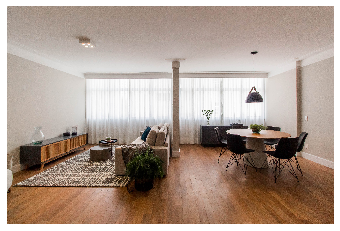

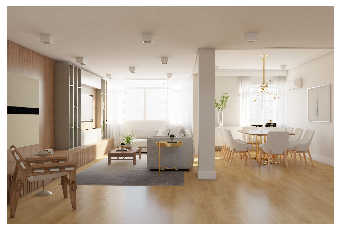

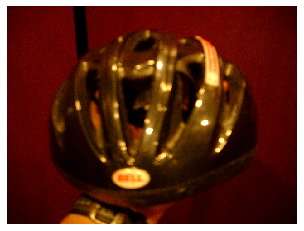

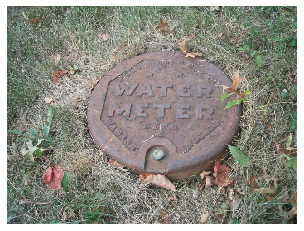

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_class = [os.path.join(class_dir, fname) 
                for fname in class_files[pic_index-2:pic_index]]
next_notclass = [os.path.join(notclass_dir, fname) 
                for fname in notclass_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_class+next_notclass):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [15]:
ls /tmp/

rps/  rps-test-set/  rps-test-set.zip  rps.zip


In [17]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=50, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 227 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

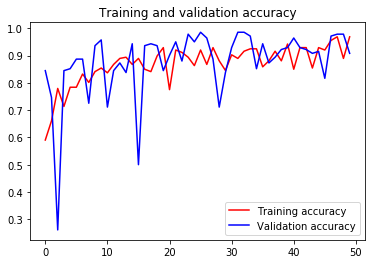

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

class - notclass

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving qy5l3x_desktop_banner.jpg to qy5l3x_desktop_banner.jpg
qy5l3x_desktop_banner.jpg
[[1. 0.]]


In [24]:
ls

00000372.jpg  00000431.jpg                sample_data/
00000373.jpg  qq68ip_desktop_living4.jpg  tb8fzl_desktop_banner.jpg
00000394.jpg  qy5l3x_desktop_banner.jpg
00000427.jpg  rps.h5


In [0]:
from google.colab import files
files.download('rps.h5') 